importing the file, select test.csv in case you want to do the model performance throughout the time series.

In [ ]:
#importing pandas to read csv files and handle data frame while numpy to handle array along with matplotlib to plot the graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files# To import the file from our local system to collab

uploaded = files.upload()

Saving intern_14March_20230710.csv to intern_14March_20230710.csv


In [ ]:
df=pd.read_csv('intern_14March_20230710.csv')#define that file as the dataframe

Data Visualisation

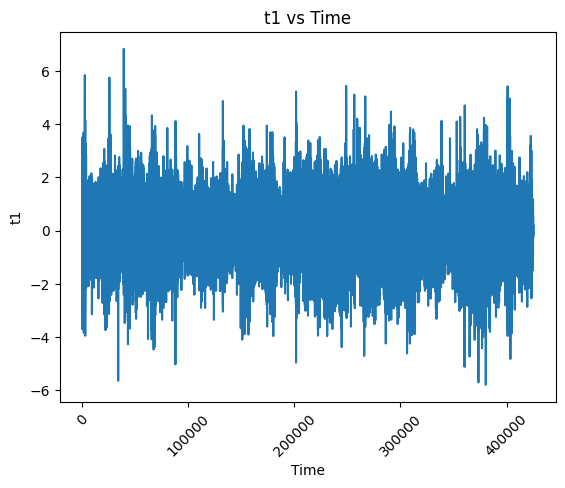

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
#in the test csv rename the column to time, also comment this line if you are doing for single day data
df.rename(columns={'Unnamed: 0': 'time'}, inplace=True)
x=df['time'].values #defining the array to get the Data values on the X
y=df['t1'].values #defining the array to get the Data values on the y

# Plot 't1' against time
plt.plot(x,y)#plotting the data

# Labeling the axes
plt.xlabel('Time')
plt.ylabel('t1')

# Adding title
plt.title('t1 vs Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Doing the same step for t2

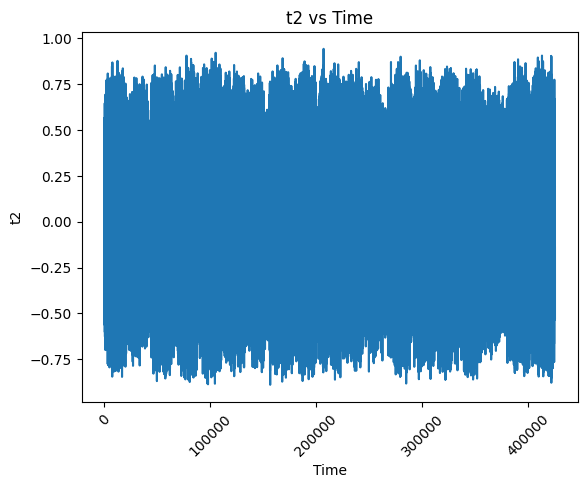

In [ ]:
x=df['time'].values
y=df['t2'].values

# Plot 't1' against time
plt.plot(x,y)

# Labeling the axes
plt.xlabel('Time')
plt.ylabel('t2')

# Adding title
plt.title('t2 vs Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

By Performing the ADF Test on the Data we can do a check for the stationarity of the data, so, if the data is stationary it will break the hypothesis of non-stationary by having the statistic come out of the confidence interval

This code will plot the trend, seasonality, cyclicity and irregularities in the data

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Generate sample data (replace this with your own array of values)
# np.random.seed(0)
# n = 100
# t = np.arange(n)
# trend = 0.5 * t
# seasonality = 10 * np.sin(2 * np.pi * t / 12)
# cyclicality = 5 * np.sin(2 * np.pi * t / 20)
# irregularity = np.random.randn(n)
data =df['t1'].values
# Convert array to pandas Series with a datetime index
ts = pd.Series(df['t1'].values, index=pd.date_range(start='2022-01-01', periods=len(df), freq='H'))

# Perform Seasonal and Trend decomposition using LOESS (STL)
stl = STL(ts, seasonal=13)
res = stl.fit()

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ax[0].plot(res.trend)
ax[0].set_title('Trend')
ax[1].plot(res.seasonal)
ax[1].set_title('Seasonality')
ax[2].plot(res.resid)
ax[2].set_title('Irregularity')
ax[3].plot(res.trend + res.seasonal)
ax[3].set_title('Trend + Seasonality')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

doing it for the data t2

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Generate sample data (replace this with your own array of values)
# np.random.seed(0)
# n = 100
# t = np.arange(n)
# trend = 0.5 * t
# seasonality = 10 * np.sin(2 * np.pi * t / 12)
# cyclicality = 5 * np.sin(2 * np.pi * t / 20)
# irregularity = np.random.randn(n)
data =df['t2'].values
# Convert array to pandas Series with a datetime index
ts = pd.Series(df['t2'].values, index=pd.date_range(start='2022-01-01', periods=len(df), freq='H'))

# Perform Seasonal and Trend decomposition using LOESS (STL)
stl = STL(ts, seasonal=13)
res = stl.fit()

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ax[0].plot(res.trend)
ax[0].set_title('Trend')
ax[1].plot(res.seasonal)
ax[1].set_title('Seasonality')
ax[2].plot(res.resid)
ax[2].set_title('Irregularity')
ax[3].plot(res.trend + res.seasonal)
ax[3].set_title('Trend + Seasonality')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
# df2=df1.drop("t1",axis=1)
# print(df2)
result = adfuller(df['t2'].values)

# Extract and print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")
else:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")

doing it for the data t1

In [ ]:
from statsmodels.tsa.stattools import adfuller
# df2=df1.drop("t1",axis=1)
# print(df2)
result = adfuller(df['t1'].values)

# Extract and print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")
else:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")

NameError: name 'df' is not defined

By doing the PACF and ACF calculation between lags we are seeing if the ARIMA model is a good model for this or not

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df1 is your time series DataFrame
# Example:
# df1 = pd.DataFrame({'value': [10, 20, 30, 40, 50]})

# Plot ACF for df1
plt.figure(figsize=(12, 6))
plot_acf(df['t2'], lags=30, ax=plt.gca())
plt.title('ACF Plot for t2')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF for df1
plt.figure(figsize=(12, 6))
plot_pacf(df['t2'], lags=30, ax=plt.gca())
plt.title('PACF Plot for t2')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


Doing the same for the t1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df1 is your time series DataFrame
# Example:
# df1 = pd.DataFrame({'value': [10, 20, 30, 40, 50]})

# Plot ACF for df1
plt.figure(figsize=(12, 6))
plot_acf(df['t1'], lags=30, ax=plt.gca())
plt.title('ACF Plot for t1')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF for df1
plt.figure(figsize=(12, 6))
plot_pacf(df['t1'], lags=30, ax=plt.gca())
plt.title('PACF Plot for t1')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


Implementing the XGBoost ALgorithm

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb



data = df['t1'].values
#THe future steps is the variable that will be trained and it will give the prediction that you want to do in the future
# Define window size for feature extraction now for finding the best window size we can run the model on multiple window sizes and can see which of that is giving the minimum Loss in the test and the train as well
window_size = 100
future_steps = 10

# Extract features and target(that is feature matrix along with a target vector of length future_steps)
X = np.array([data[i:i+window_size] for i in range(len(data) - window_size - future_steps)])
y = np.array([data[i+window_size:i+window_size+future_steps] for i in range(len(data) - window_size - future_steps)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.3599829372454987


In [ ]:
arr=data[-100:]
print(arr)
arr=arr.reshape(1,- 1)
print(arr)
result = np.vstack((X_test, arr))
print(result[-1])
ar=model.predict(result)
print(ar[-1])
#the very last line is the actual prediction into the future whose data we dont have

[-0.018313 -0.05456   0.092641 -0.001792  0.031267  0.040503 -0.058636
 -0.053096  0.12421   0.039032  0.052316 -0.033961 -0.055393  0.027038
  0.007084 -0.005624  0.024478  0.000711 -0.082129  0.057028 -0.121791
 -0.012459 -0.04585  -0.048819  0.018279 -0.055258 -0.045719  0.011769
 -0.054807 -0.139289  0.065224 -0.021453 -0.039381 -0.068109  0.018696
 -0.128202 -0.107769  0.146171 -0.084558  0.156431 -0.175523 -0.083808
 -0.037621 -0.003146 -0.121029 -0.079444 -0.287712  0.091537 -0.076715
 -0.063875  0.003113 -0.103333 -0.07833   0.00665  -0.07057  -0.003894
  0.012422 -0.019674 -0.217885 -0.001147 -0.035997 -0.09267  -0.089197
  0.038563 -0.107634  0.003801  0.128081 -0.023577 -0.01864  -0.055853
 -0.029996  0.063729 -0.024839 -0.026315 -0.264351  0.200603 -0.072132
  0.078501 -0.136505 -0.063109 -0.022557  0.142775 -0.277232  0.046284
 -0.121923 -0.017516 -0.084649 -0.027022 -0.026921 -0.03883  -0.150219
  0.004163  0.04338   0.066351 -0.123526 -0.038813  0.211145 -0.104601
  0.01

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Example dataset (replace with your data)
# np.random.seed(0)
data = df['t1'].values

# Extract features (last 1000 values) and target (next 100 values)
window_size = 100
future_steps = 10

X = []
y = []

for i in range(len(data) - window_size - future_steps):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size:i+window_size+future_steps])

X = np.array(X)
y = np.array(y)

# Reshape X for Conv1D
X = X.reshape(X.shape[0], X.shape[1], 1)

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, window_size)).reshape(X.shape)

# Split data into training and testing based on time
split_ratio = 0.8
split_index = int(split_ratio * len(X_normalized))

X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define CNN model with more hidden layers, filters, and dropout
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(window_size, 1), kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10)  # Output 100 values
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)




Following is the implementation of the LSTM model, the loss function of that also is nearby that of the XGBoost

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers

# Example dataset (replace with your data)
# np.random.seed(0)
data = df['t1'].values

# Function to create input-output pairs
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+future_steps])
    return np.array(X), np.array(y)

# Parameters
window_size = 100
future_steps = 10

# Create input-output pairs
X, y = create_dataset(data, window_size, future_steps)

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, window_size)).reshape(X.shape)

# Reshape X for LSTM
X_reshaped = X_normalized.reshape(X_normalized.shape[0], window_size, 1)

# Split data into training and testing based on time
split_ratio = 0.8
split_index = int(split_ratio * len(X_reshaped))

X_train, X_test = X_reshaped[:split_index], X_reshaped[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define LSTM model with stacked architecture
model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(units=128, return_sequences=True),
    Dropout(0.2),
    LSTM(units=128),  # Stacked LSTM
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dense(units=future_steps)  # Output 10 values
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

# Predict next 10 values



140/140 [==============================] - 22s 156ms/step - loss: 0.4108
Mean Squared Error: 0.4107724130153656


In [ ]:
last_window = X_normalized[-1].reshape(1, window_size, 1)
future_predictions = model.predict(last_window)

# Inverse transform the predicted values
future_predictions_denormalized = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

print("Future Predictions (Denormalized):", future_predictions_denormalized)

In the following part we can see that how much relevance the model can have in short time period but it will decrease with the size of the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

In [ ]:
df=pd.read_csv('intern_14March_20230707.csv')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPooling1D



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
print(df)
df=df.drop('t2',axis=1)
df=df.drop('Time',axis=1)
df = df.rename(columns={'Unnamed: 0': 'time'})
df.set_index(['time'],inplace=True)
df_1=df.values

df_1=df_1.astype('float32')

ts=df_1

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [ ]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 15000
Xtrain = X[:k,:,:]
Ytrain = Y[:k]

In [ ]:
#model architecture for the CNN that is going to be trained
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=20)

In [ ]:
Xtest = X[k:,:,:]
Ytest= Y[k:]

In [ ]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)
Ytest=Ytest.reshape(-1,1)
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)
Ytrain=Ytrain.reshape(-1,1)
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()